In [1]:
library(UpSetR)
library(SuperExactTest)

Loading required package: grid

Attaching package: ‘SuperExactTest’

The following objects are masked from ‘package:base’:

    intersect, union



In [2]:
library(foreach)
library(reshape2)
library(gplots)
library(RColorBrewer)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [3]:
cutoff=0.1

In [4]:
read_dge=function(p) {
    n=gsub("comp\\.","",p,perl=TRUE)
    f=sprintf("%s/dge.full.tsv.gz",p)
    d=read.delim(gzfile(f),sep="\t")
    d=transform(d,GENEID=as.character(d$GENEID),target_id=d$target_id)
    data.frame(comp=n,d)
}

In [5]:
read_dge2=function(n) {
    f=sprintf("factors/%s/dge.full.tsv.gz",n)
    d=read.delim(gzfile(f),sep="\t")
    d=transform(d,GENEID=as.character(d$GENEID),target_id=d$target_id)
    data.frame(comp=n,d)
}

In [6]:
f=do.call(rbind.data.frame,lapply(list.files(path="factors"),read_dge2))

In [7]:
d=do.call(rbind.data.frame,lapply(list.files(path = ".",pattern="comp\\..+_vs_.+"),read_dge))

In [8]:
d=d[,intersect(names(d),names(f))]
f=f[,intersect(names(d),names(f))]

In [9]:
head(d)
head(f)

comp,GENEID,target_id,pval.lrt,qval.lrt,test_stat,rss,degrees_free,mean_obs.lrt,var_obs.lrt,⋯,has_protein_homology,has_proteomics_support,encoded_by,is_filtered,name,source,defline,superfamily,inferred_by_rule,TAP_class
deltaDEK_vs_OE,Pp3c17_17550,Pp3c17_17550.mRNA,1.384439e-35,2.985126e-31,155.0225,220.9191,1,8.697594,8.792255,⋯,true,"false,true",protein_coding_gene,false,DEK1,pdef,3.4.22.54 - Calpain-3 / Muscle-specific calcium-activated neutral protease 3 (1 of 2),NA,NA,NA
deltaDEK_vs_OE,Pp3c2_27820,Pp3c2_27820.mRNA,4.094948e-31,3.784259e-27,134.5725,299.2623,1,2.903419,11.605347,⋯,true,false,protein_coding_gene,false,NA,NA,NA,NA,NA,NA
deltaDEK_vs_OE,Pp3s44_20,Pp3s44_20.mRNA,5.265178e-31,3.784259e-27,134.0734,289.1164,1,2.784547,11.314690,⋯,true,true,protein_coding_gene,false,NA,NA,NA,NA,NA,NA
deltaDEK_vs_OE,Pp3c13_120,Pp3c13_120.mRNA,7.892212e-31,4.254297e-27,133.2698,324.8649,1,3.067528,12.625514,⋯,true,false,protein_coding_gene,false,NA,NA,NA,NA,NA,NA
deltaDEK_vs_OE,Pp3c4_21860,Pp3c4_21860.mRNA,9.252607e-30,3.990094e-26,128.3834,324.4342,1,2.905464,12.663730,⋯,true,false,protein_coding_gene,false,NA,pdef,PF14009 - Domain of unknown function (DUF4228) (DUF4228) (1 of 19),NA,NA,NA
deltaDEK_vs_OE,Pp3c13_7860,Pp3c13_7860.mRNA,2.447977e-29,8.797215e-26,126.4524,235.4235,1,2.452029,9.163655,⋯,true,false,protein_coding_gene,false,NA,pdef,K10743 - ribonuclease H2 subunit A (RNASEH2A) (1 of 1),NA,NA,NA


comp,GENEID,target_id,pval.lrt,qval.lrt,test_stat,rss,degrees_free,mean_obs.lrt,var_obs.lrt,⋯,has_protein_homology,has_proteomics_support,encoded_by,is_filtered,name,source,defline,superfamily,inferred_by_rule,TAP_class
colony_size.normal_vs_enlarged,Pp3c2_27820,Pp3c2_27820.mRNA,5.634126e-31,1.236747e-26,133.9390,215.5590,1,4.496321,9.374229,⋯,true,false,protein_coding_gene,false,NA,NA,NA,NA,NA,NA
colony_size.normal_vs_enlarged,Pp3c17_9430,Pp3c17_9430.mRNA,5.705468e-29,6.262036e-25,124.7733,205.6731,1,4.368850,8.964143,⋯,true,false,protein_coding_gene,false,NA,pdef,PTHR11439//PTHR11439:SF180 - GAG-POL-RELATED RETROTRANSPOSON // SUBFAMILY NOT NAMED (1 of 1),NA,NA,NA
colony_size.normal_vs_enlarged,Pp3s44_20,Pp3s44_20.mRNA,1.245361e-28,9.112306e-25,123.2244,194.7028,1,4.233435,8.467079,⋯,true,true,protein_coding_gene,false,NA,NA,NA,NA,NA,NA
colony_size.normal_vs_enlarged,Pp3c17_10030,Pp3c17_10030.mRNA,2.608974e-28,1.431740e-24,121.7571,227.0949,1,4.818505,9.882504,⋯,true,false,protein_coding_gene,false,NA,NA,NA,NA,NA,NA
colony_size.normal_vs_enlarged,Pp3c13_120,Pp3c13_120.mRNA,1.306286e-27,5.734857e-24,118.5617,221.5444,1,4.778867,9.651299,⋯,true,false,protein_coding_gene,false,NA,NA,NA,NA,NA,NA
colony_size.normal_vs_enlarged,Pp3c13_7860,Pp3c13_7860.mRNA,1.671048e-27,6.113529e-24,118.0732,167.0148,1,3.874520,7.261687,⋯,true,false,protein_coding_gene,false,NA,pdef,K10743 - ribonuclease H2 subunit A (RNASEH2A) (1 of 1),NA,NA,NA


In [10]:
D=subset(d,qval.lrt<cutoff)
F=subset(f,qval.lrt<cutoff)

In [11]:
sD=subset(d,qval.lrt<0.01)
sF=subset(f,qval.lrt<0.01)

In [12]:
DD=rbind(D,F)

In [13]:
sDD=rbind(sD,sF)

In [14]:
table(DD$comp,DD$b>0)

                                                
                                                 FALSE TRUE
  deltaDEK_vs_OE                                  8675 8842
  WT_vs_deltaDEK                                  6534 5933
  WT_vs_LG3                                       3889 3582
  WT_vs_Loop                                      2714 3144
  WT_vs_OE                                        8029 7715
  colony_size.normal_vs_enlarged                  5692 5485
  colony_size.normal_vs_reduced                    614  993
  development_of_phyllids.normal_vs_aberrant       867  952
  development_of_phyllids.normal_vs_delayed       3944 3497
  elongation_caulonema.early.normal_vs_elongated  1857 1359
  elongation_caulonema.early.normal_vs_reduced    1347 1201
  elongation_caulonema.late.normal_vs_elongated   5925 5753
  elongation_caulonema.late.normal_vs_reduced      440  371
  gametophore_formation.normal_vs_aberrant         867  952
  gametophore_formation.normal_vs_arrested        1

In [15]:
Lu=sapply(levels(DD$comp),function(x) {
    unique(as.character(subset(DD,comp==x & b>0)$target_id))
})
Ld=sapply(levels(DD$comp),function(x) {
    unique(as.character(subset(DD,comp==x & b<0)$target_id))
})
names(Lu)=paste(names(Lu),"up",sep=".")
names(Ld)=paste(names(Ld),"down",sep=".")
L=c(Lu,Ld)
str(L)

List of 44
 $ deltaDEK_vs_OE.up                                  : chr [1:8842] "Pp3c17_17550.mRNA" "Pp3c24_2170.mRNA" "Pp3c5_28230.mRNA" "Pp3c17_9369.mRNA" ...
 $ WT_vs_deltaDEK.up                                  : chr [1:5933] "Pp3c21_8110.mRNA" "Pp3c16_24530.mRNA" "Pp3c1_32020.mRNA" "Pp3c11_12520.mRNA" ...
 $ WT_vs_LG3.up                                       : chr [1:3582] "Pp3c24_13920.mRNA" "Pp3c24_19500.mRNA" "Pp3c24_15180.mRNA" "Pp3c24_6340.mRNA" ...
 $ WT_vs_Loop.up                                      : chr [1:3144] "Pp3c21_8110.mRNA" "Pp3c11_7360.mRNA" "Pp3s406_20.mRNA" "Pp3c16_24530.mRNA" ...
 $ WT_vs_OE.up                                        : chr [1:7715] "Pp3c17_17550.mRNA" "Pp3c5_28230.mRNA" "Pp3c24_2170.mRNA" "Pp3c6_19501.mRNA" ...
 $ colony_size.normal_vs_enlarged.up                  : chr [1:5485] "Pp3c6_19501.mRNA" "Pp3c4_31690.mRNA" "Pp3c1_680.mRNA" "Pp3c18_12300.mRNA" ...
 $ colony_size.normal_vs_reduced.up                   : chr [1:993] "Pp3c24_13920.mRNA" "

In [16]:
sLu=sapply(levels(sDD$comp),function(x) {
    unique(as.character(subset(sDD,comp==x & b>0)$target_id))
})
sLd=sapply(levels(sDD$comp),function(x) {
    unique(as.character(subset(sDD,comp==x & b<0)$target_id))
})
names(sLu)=paste(names(sLu),"up",sep=".")
names(sLd)=paste(names(sLd),"down",sep=".")
sL=c(sLu,sLd)
str(sL)

List of 44
 $ deltaDEK_vs_OE.up                                  : chr [1:5991] "Pp3c17_17550.mRNA" "Pp3c24_2170.mRNA" "Pp3c5_28230.mRNA" "Pp3c17_9369.mRNA" ...
 $ WT_vs_deltaDEK.up                                  : chr [1:1916] "Pp3c21_8110.mRNA" "Pp3c16_24530.mRNA" "Pp3c1_32020.mRNA" "Pp3c11_12520.mRNA" ...
 $ WT_vs_LG3.up                                       : chr [1:1407] "Pp3c24_13920.mRNA" "Pp3c24_19500.mRNA" "Pp3c24_15180.mRNA" "Pp3c24_6340.mRNA" ...
 $ WT_vs_Loop.up                                      : chr [1:1365] "Pp3c21_8110.mRNA" "Pp3c11_7360.mRNA" "Pp3s406_20.mRNA" "Pp3c16_24530.mRNA" ...
 $ WT_vs_OE.up                                        : chr [1:2405] "Pp3c17_17550.mRNA" "Pp3c5_28230.mRNA" "Pp3c24_2170.mRNA" "Pp3c6_19501.mRNA" ...
 $ colony_size.normal_vs_enlarged.up                  : chr [1:1530] "Pp3c6_19501.mRNA" "Pp3c4_31690.mRNA" "Pp3c1_680.mRNA" "Pp3c18_12300.mRNA" ...
 $ colony_size.normal_vs_reduced.up                   : chr [1:575] "Pp3c24_13920.mRNA" "

In [17]:
save(L,file = "DEGs.set_lists.qval0.1.RData")
save(sL,file = "DEGs.set_lists.qval0.01.RData")

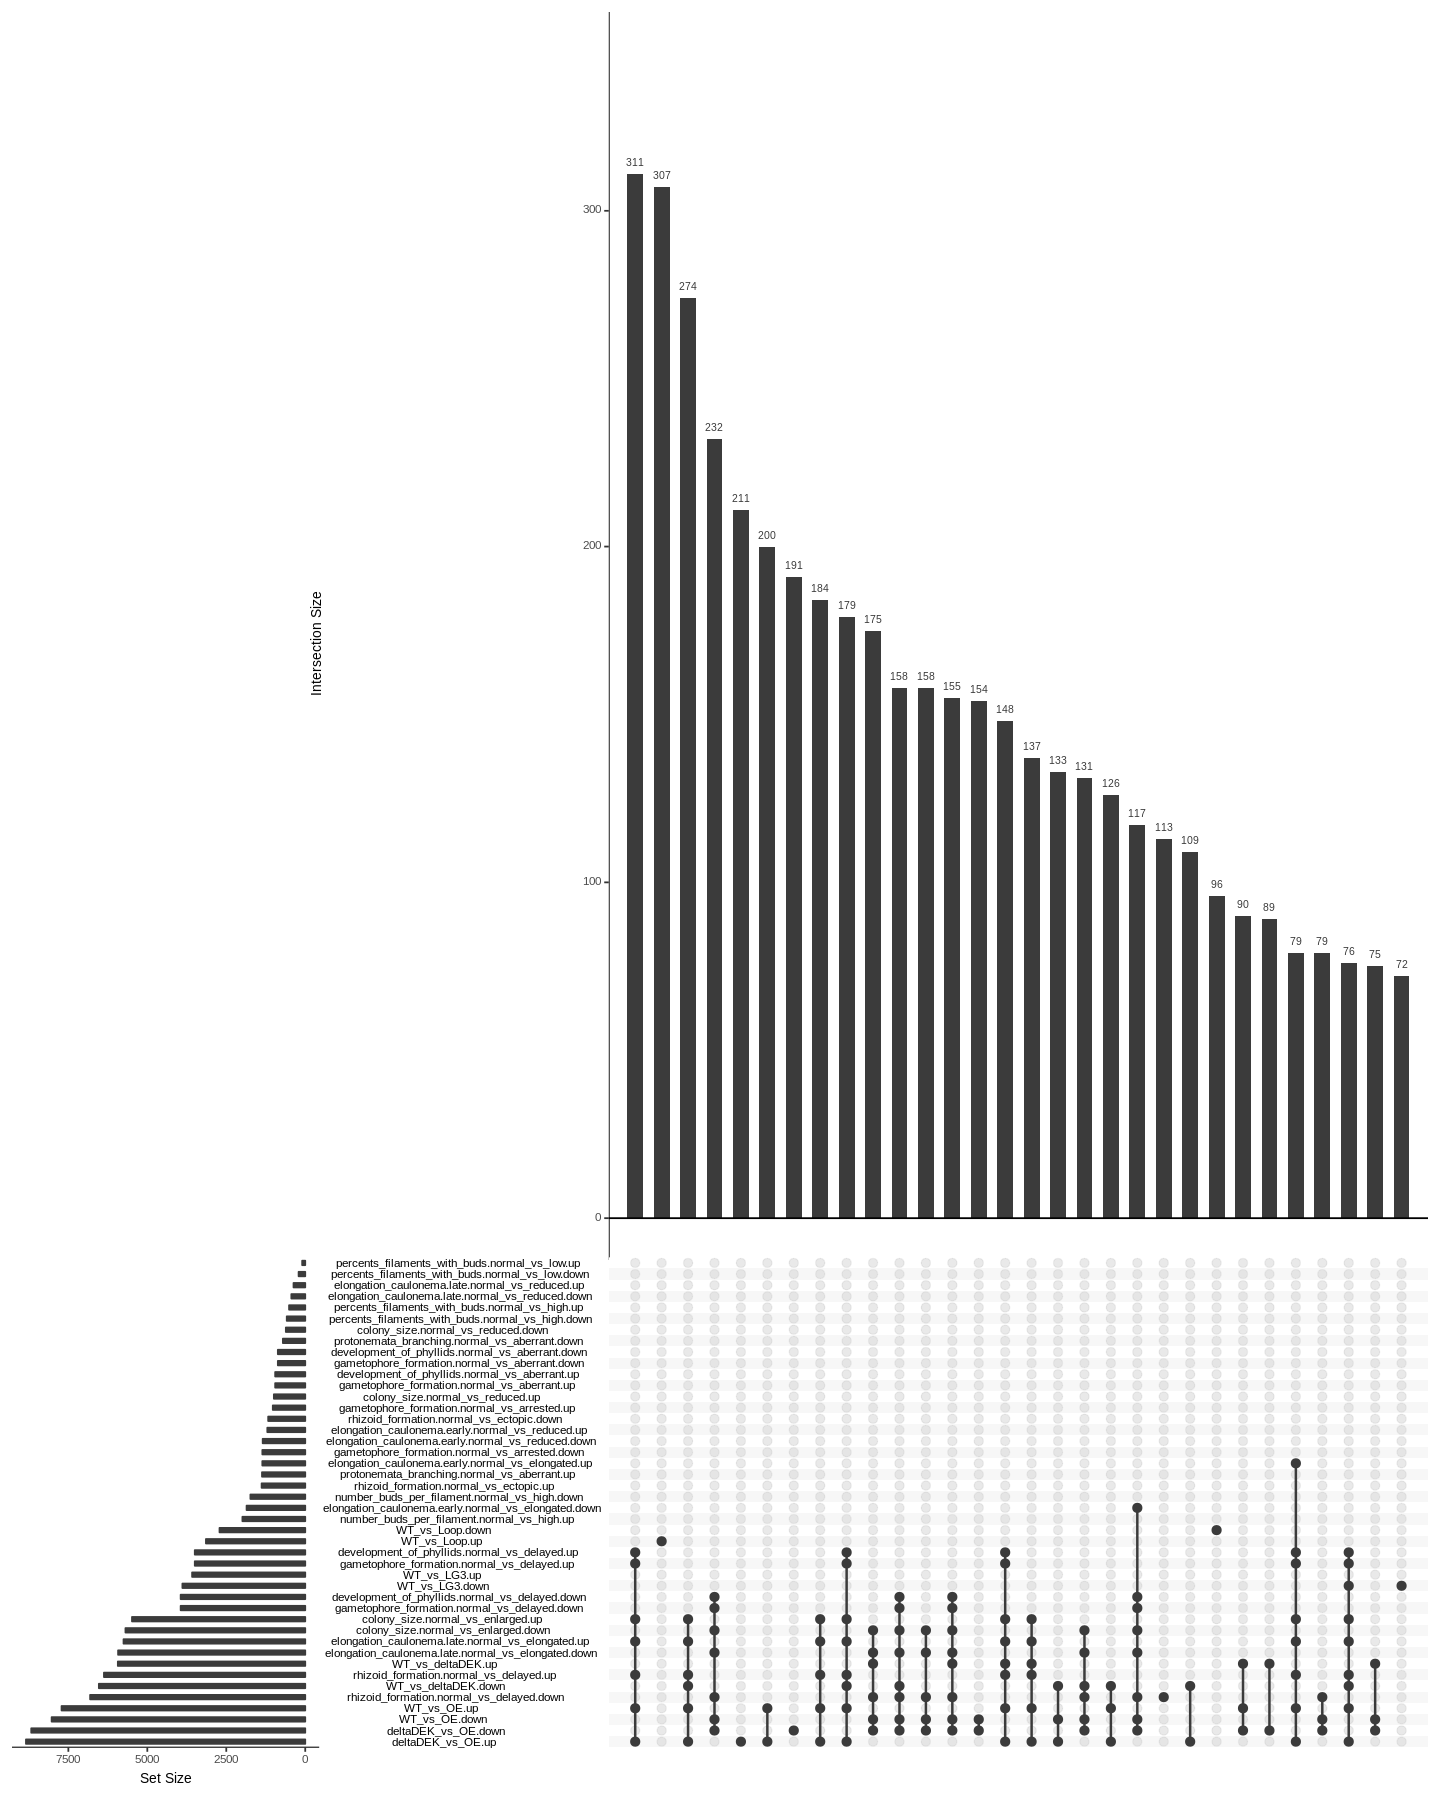

In [18]:
options(repr.plot.width=12, repr.plot.height=15)
upset(fromList(L), order.by = "freq",keep.order = TRUE,nsets=length(names(L)),nintersects=30)

In [19]:
jacdist=function(x,y) {
    x=unique(as.character(x))
    y=unique(as.character(y))
    I=length(intersect(x,y))
    return(I/(length(x)+length(y)-I))
}

In [20]:
my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)

In [21]:
JDL=foreach (x=names(L),.combine="cbind") %:% 
    foreach (y=names(L), .combine="c") %do% {
        jacdist(L[[x]],L[[y]])
}
dimnames(JDL)=list(names(L),names(L))
JDL=as.dist(1-JDL)

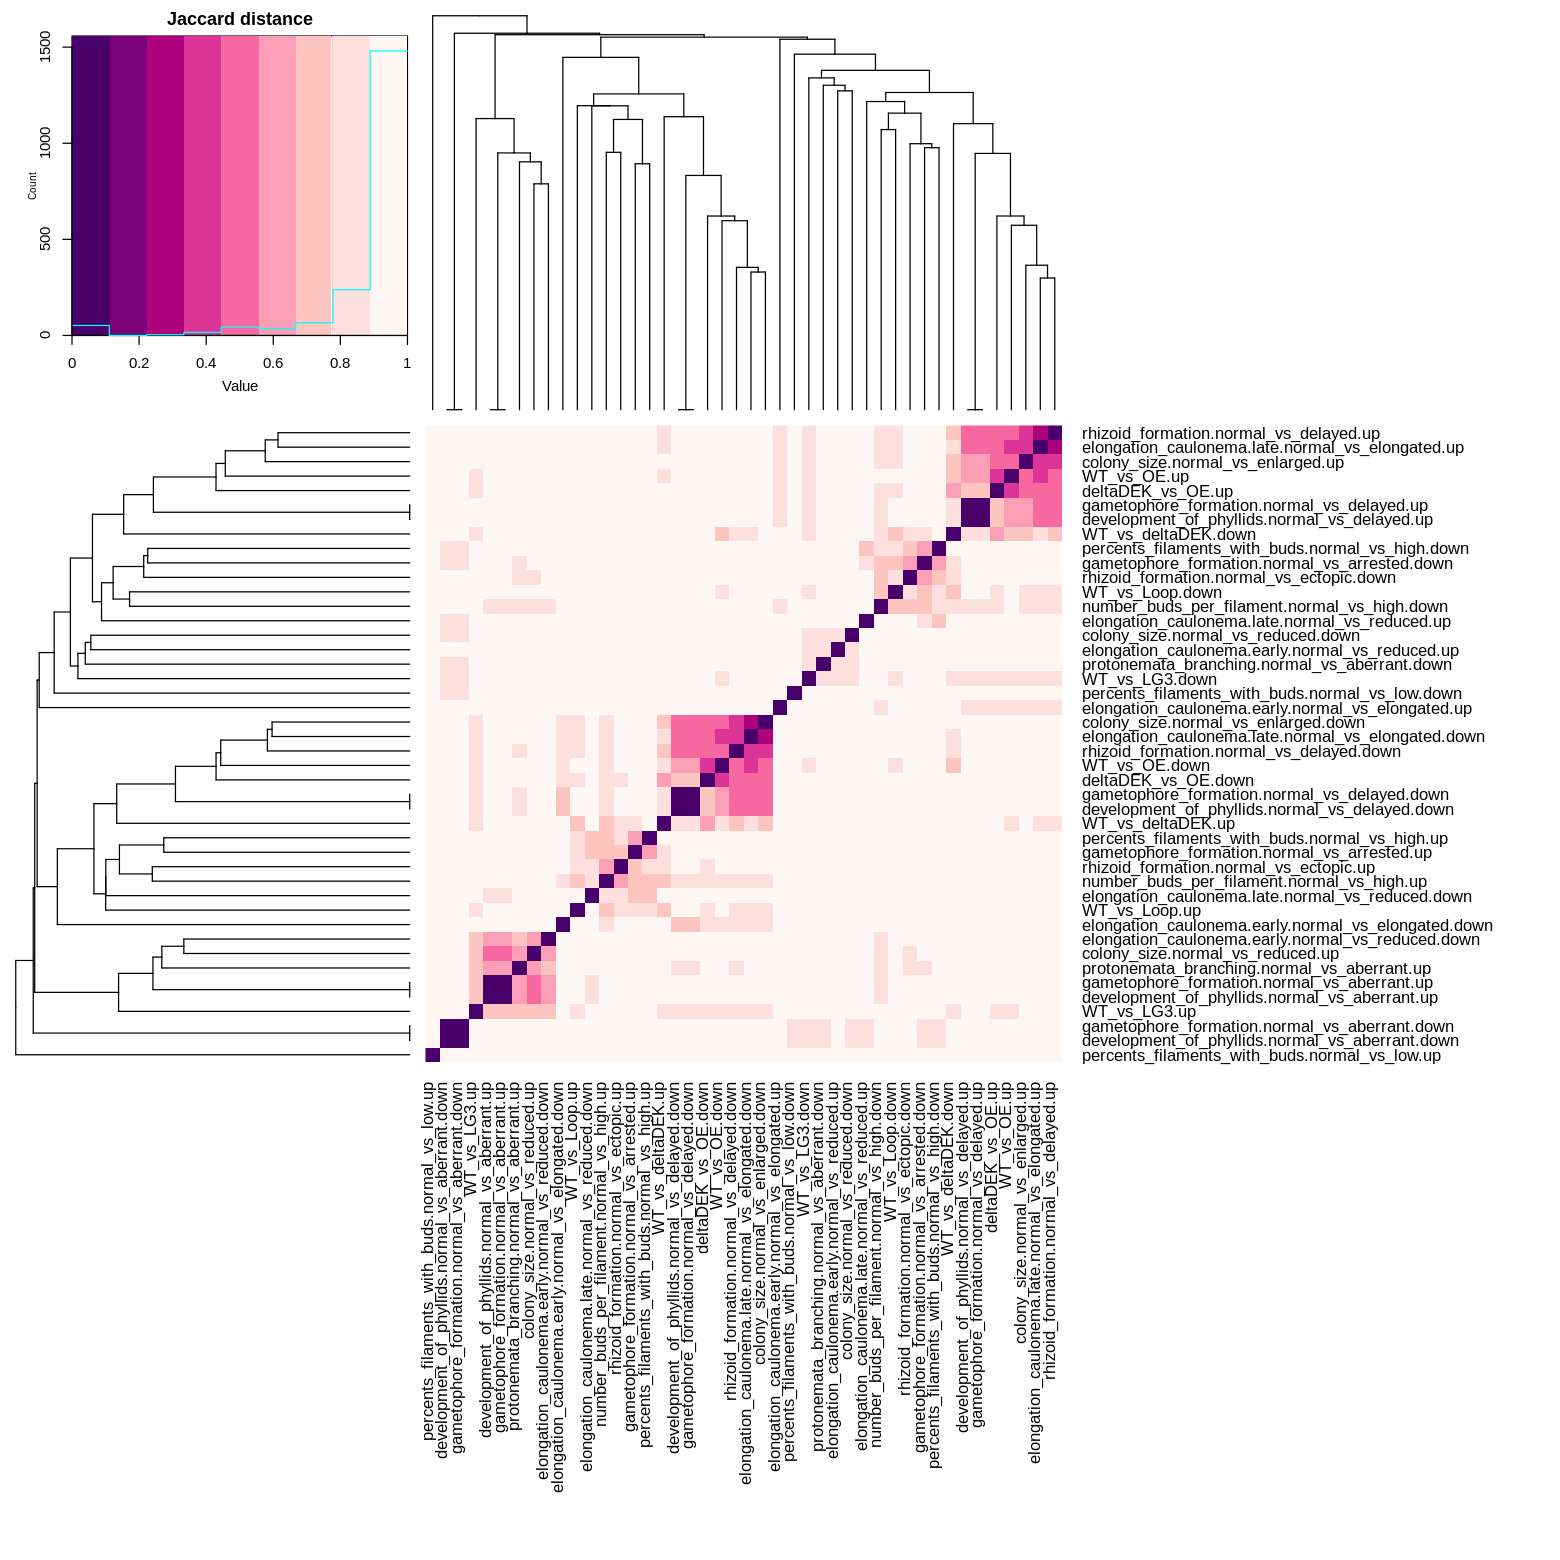

In [22]:
options(repr.plot.width=13, repr.plot.height=13)
heatmap.2(as.matrix(JDL),cexRow=1,cexCol=1,margins=c(25,25),col=rev(brewer.pal(9,"RdPu")),trace="none",key.title="Jaccard distance",hclustfun=function(x){hclust(x,method="single")})

In [23]:
Lu=sapply(levels(D$comp),function(x) {
    unique(as.character(subset(D,comp==x & b>0)$target_id))
})
Ld=sapply(levels(D$comp),function(x) {
    unique(as.character(subset(D,comp==x & b<0)$target_id))
})
names(Lu)=paste(names(Lu),"up",sep=".")
names(Ld)=paste(names(Ld),"down",sep=".")
L=c(Lu,Ld)
str(L)

List of 10
 $ deltaDEK_vs_OE.up  : chr [1:8842] "Pp3c17_17550.mRNA" "Pp3c24_2170.mRNA" "Pp3c5_28230.mRNA" "Pp3c17_9369.mRNA" ...
 $ WT_vs_deltaDEK.up  : chr [1:5933] "Pp3c21_8110.mRNA" "Pp3c16_24530.mRNA" "Pp3c1_32020.mRNA" "Pp3c11_12520.mRNA" ...
 $ WT_vs_LG3.up       : chr [1:3582] "Pp3c24_13920.mRNA" "Pp3c24_19500.mRNA" "Pp3c24_15180.mRNA" "Pp3c24_6340.mRNA" ...
 $ WT_vs_Loop.up      : chr [1:3144] "Pp3c21_8110.mRNA" "Pp3c11_7360.mRNA" "Pp3s406_20.mRNA" "Pp3c16_24530.mRNA" ...
 $ WT_vs_OE.up        : chr [1:7715] "Pp3c17_17550.mRNA" "Pp3c5_28230.mRNA" "Pp3c24_2170.mRNA" "Pp3c6_19501.mRNA" ...
 $ deltaDEK_vs_OE.down: chr [1:8675] "Pp3c2_27820.mRNA" "Pp3s44_20.mRNA" "Pp3c13_120.mRNA" "Pp3c4_21860.mRNA" ...
 $ WT_vs_deltaDEK.down: chr [1:6534] "Pp3c17_17550.mRNA" "Pp3c2_22630.mRNA" "Pp3c21_5540.mRNA" "Pp3c14_12940.mRNA" ...
 $ WT_vs_LG3.down     : chr [1:3889] "Pp3c21_14179.mRNA" "Pp3c5_14860.mRNA" "Pp3c26_6380.mRNA" "Pp3c23_14490.mRNA" ...
 $ WT_vs_Loop.down    : chr [1:2714] "Pp3c4_2

In [24]:
JDL=foreach (x=names(L),.combine="cbind") %:% 
    foreach (y=names(L), .combine="c") %do% {
        jacdist(L[[x]],L[[y]])
}
dimnames(JDL)=list(names(L),names(L))
JDL=as.dist(1-JDL)

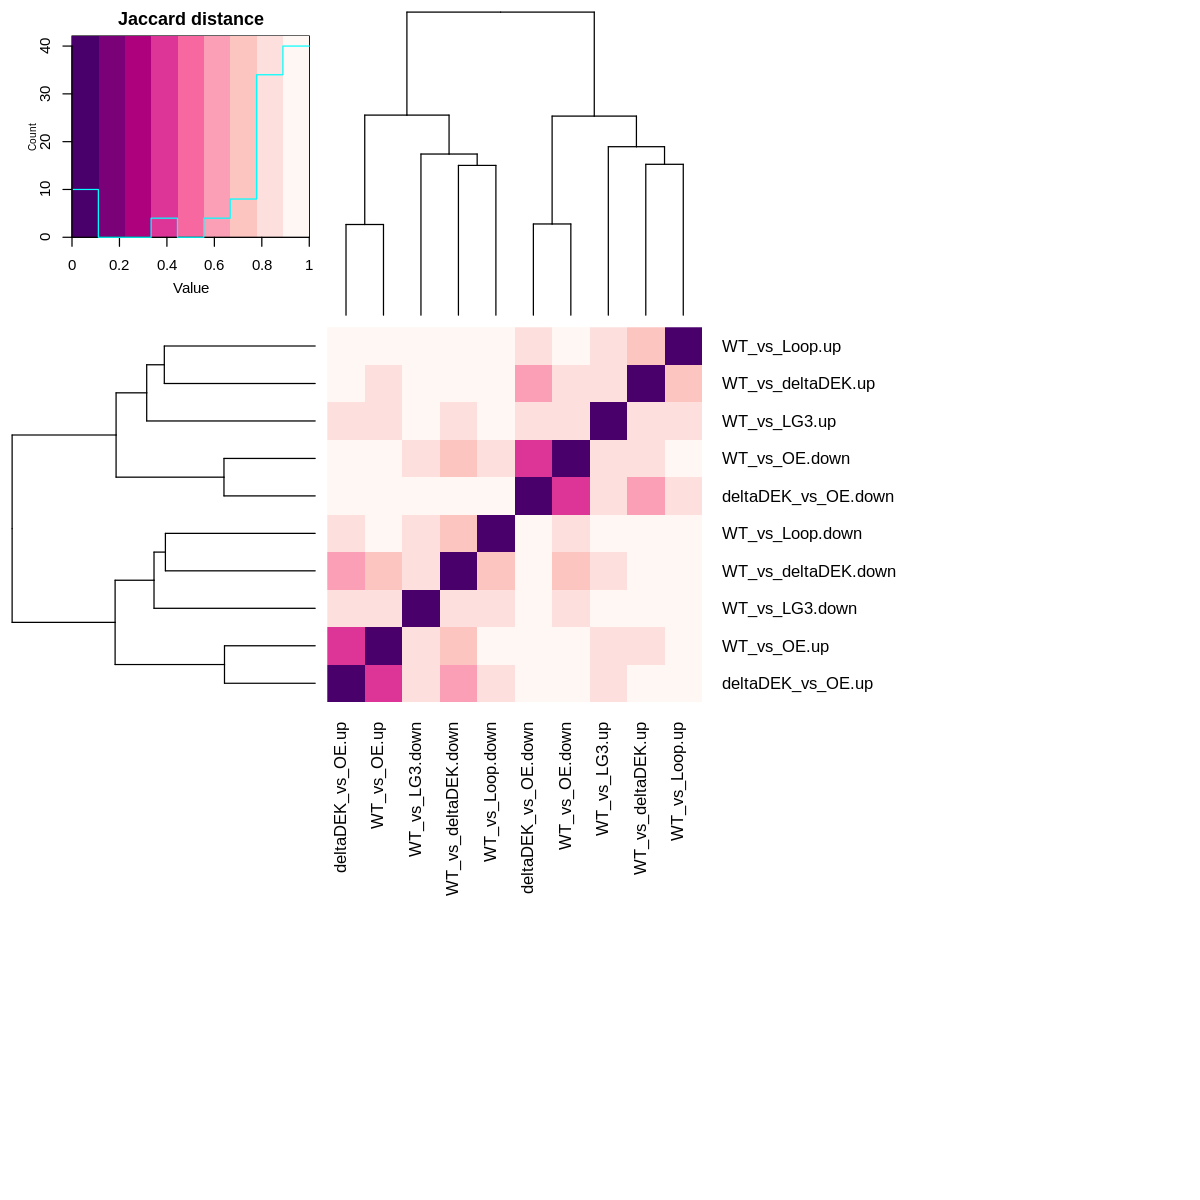

In [25]:
options(repr.plot.width=10, repr.plot.height=10)
heatmap.2(as.matrix(JDL),cexRow=1,cexCol=1,margins=c(25,25),col=rev(brewer.pal(9,"RdPu")),trace="none",key.title="Jaccard distance",hclustfun=function(x){hclust(x,method="ward.D2")})

In [26]:
Lu=sapply(levels(F$comp),function(x) {
    unique(as.character(subset(F,comp==x & b>0)$target_id))
})
Ld=sapply(levels(F$comp),function(x) {
    unique(as.character(subset(F,comp==x & b<0)$target_id))
})
names(Lu)=paste(names(Lu),"up",sep=".")
names(Ld)=paste(names(Ld),"down",sep=".")
L=c(Lu,Ld)
str(L)

List of 34
 $ colony_size.normal_vs_enlarged.up                  : chr [1:5485] "Pp3c6_19501.mRNA" "Pp3c4_31690.mRNA" "Pp3c1_680.mRNA" "Pp3c18_12300.mRNA" ...
 $ colony_size.normal_vs_reduced.up                   : chr [1:993] "Pp3c24_13920.mRNA" "Pp3c24_5170.mRNA" "Pp3c24_6340.mRNA" "Pp3c24_8100.mRNA" ...
 $ development_of_phyllids.normal_vs_aberrant.up      : chr [1:952] "Pp3c24_13920.mRNA" "Pp3c24_5170.mRNA" "Pp3c24_12530.mRNA" "Pp3c24_5950.mRNA" ...
 $ development_of_phyllids.normal_vs_delayed.up       : chr [1:3497] "Pp3c17_17550.mRNA" "Pp3c24_2170.mRNA" "Pp3c5_28230.mRNA" "Pp3c15_970.mRNA" ...
 $ elongation_caulonema.early.normal_vs_elongated.up  : chr [1:1359] "Pp3c21_6228.mRNA" "Pp3c2_29920.mRNA" "Pp3c18_12300.mRNA" "Pp3c13_15800.mRNA" ...
 $ elongation_caulonema.early.normal_vs_reduced.up    : chr [1:1201] "Pp3c23_14490.mRNA" "Pp3c14_8127.mRNA" "Pp3c23_15650.mRNA" "Pp3c9_14530.mRNA" ...
 $ elongation_caulonema.late.normal_vs_elongated.up   : chr [1:5753] "Pp3c17_17550.mRNA" "P

In [27]:
JDL=foreach (x=names(L),.combine="cbind") %:% 
    foreach (y=names(L), .combine="c") %do% {
        jacdist(L[[x]],L[[y]])
}
dimnames(JDL)=list(names(L),names(L))
JDL=as.dist(1-JDL)

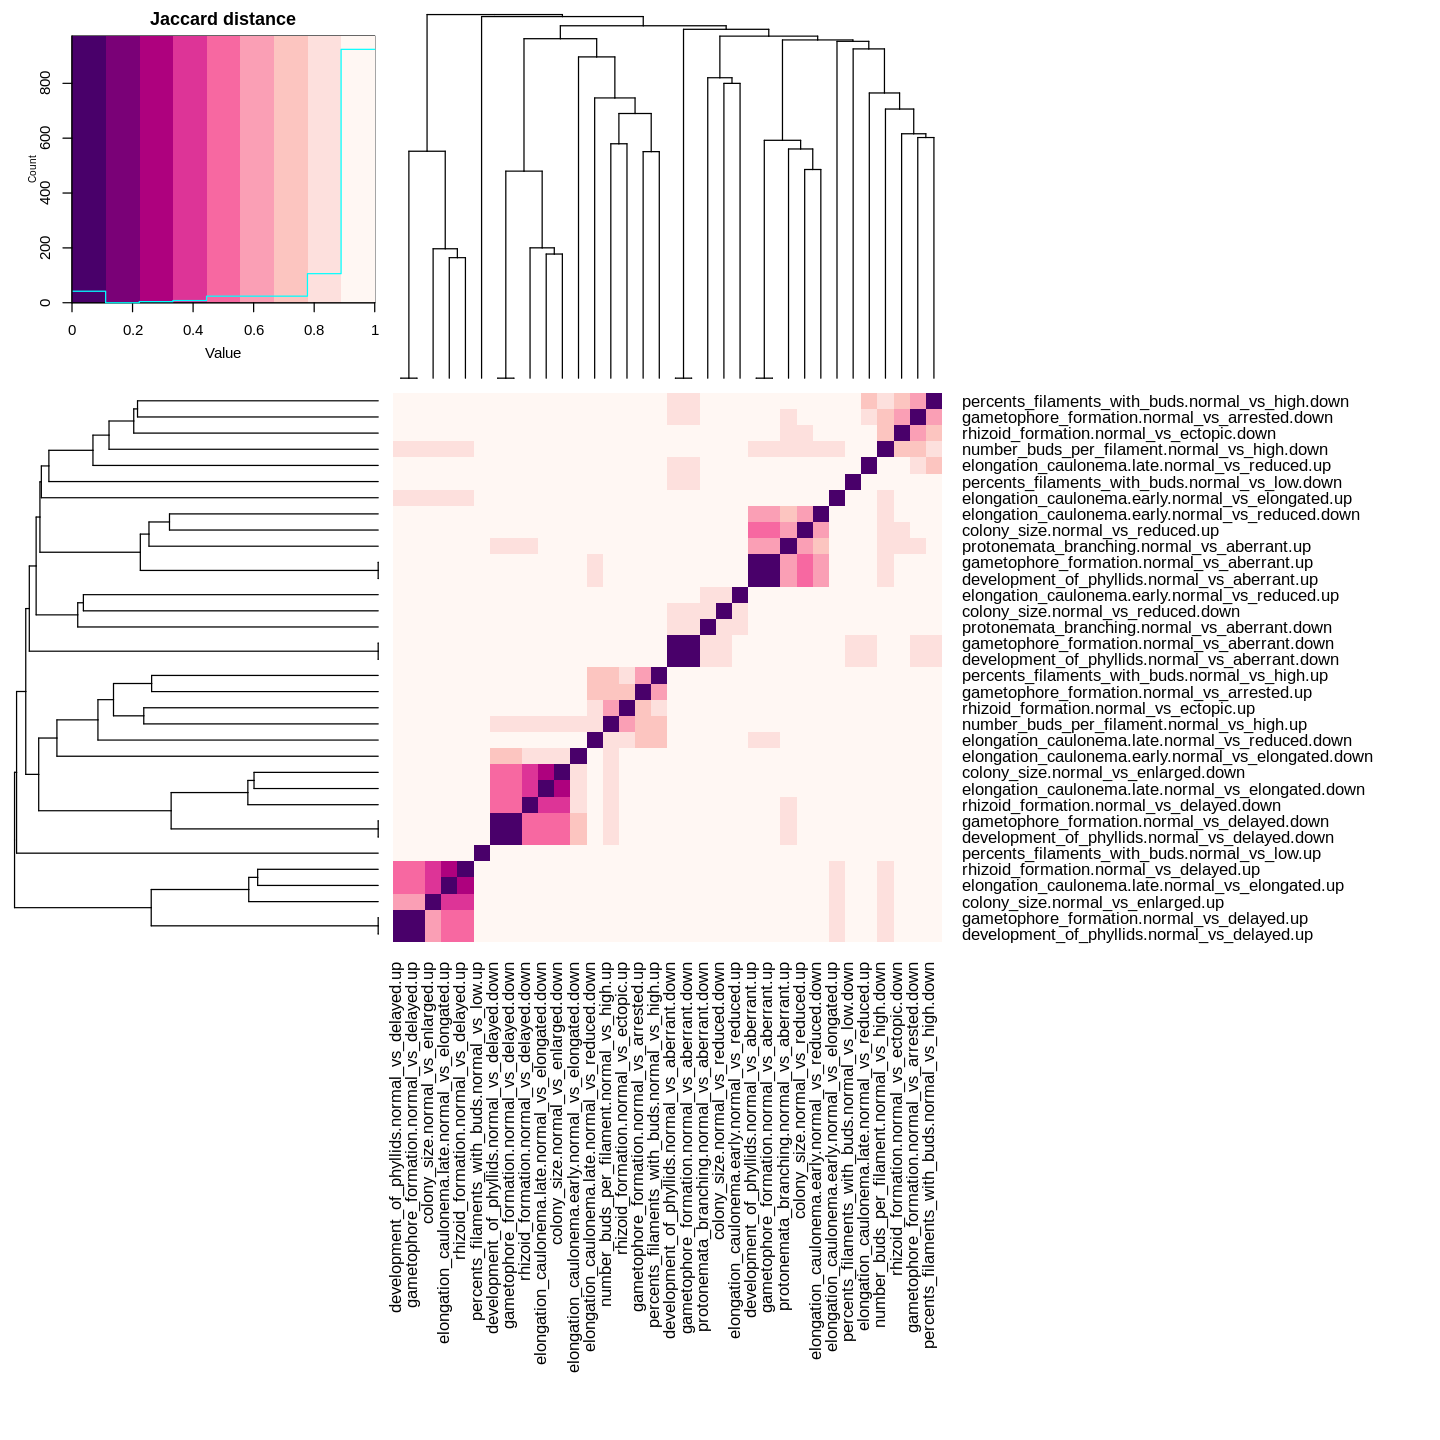

In [28]:
options(repr.plot.width=12, repr.plot.height=12)
heatmap.2(as.matrix(JDL),cexRow=1,cexCol=1,margins=c(25,25),col=rev(brewer.pal(9,"RdPu")),trace="none",key.title="Jaccard distance",hclustfun=function(x){hclust(x,method="single")})

In [29]:
candidates=read.csv("../../cell_divison_dev_transition_targets/candidates.csv",stringsAsFactors=FALSE)
candidates$target_id=gsub("V3\\.\\d+$",".mRNA",candidates$id)

In [30]:
candidates=merge(candidates,subset(DD,qval.lrt<0.1 ),by="target_id")

In [31]:
table(candidates$comp,ifelse(candidates$b>0,"up","down"),candidates$name.x)

, ,  = APB-1

                                                
                                                 down up
  deltaDEK_vs_OE                                    0  0
  WT_vs_deltaDEK                                    0  1
  WT_vs_LG3                                         0  0
  WT_vs_Loop                                        0  0
  WT_vs_OE                                          0  0
  colony_size.normal_vs_enlarged                    0  0
  colony_size.normal_vs_reduced                     0  0
  development_of_phyllids.normal_vs_aberrant        0  0
  development_of_phyllids.normal_vs_delayed         0  0
  elongation_caulonema.early.normal_vs_elongated    0  0
  elongation_caulonema.early.normal_vs_reduced      0  0
  elongation_caulonema.late.normal_vs_elongated     0  0
  elongation_caulonema.late.normal_vs_reduced       0  0
  gametophore_formation.normal_vs_aberrant          0  0
  gametophore_formation.normal_vs_arrested          0  0
  gametophore_formation.n

In [32]:
library(reshape2)

In [33]:
nn=read.delim("../analysis//gene_names.classes.csv",sep=";")

In [34]:
DDD=rbind(d,f)

In [35]:
x=dcast(DDD,target_id~comp,value.var = "qval.lrt",fill=NA)
names(x)[-1]=paste(names(x)[-1],"qval_lrt",sep=".")
write.table(merge(nn,merge(merge(dcast(DDD,target_id+superfamily+TAP_class+defline~comp,value.var = "b",fill=NA),
                           dcast(DDD,target_id~comp,value.var = "test_stat",fill=NA),by="target_id",suffixes=c(".b_wt",".test_stat_lrt")),
                            x,by="target_id"),by.x="geneid",by.y="target_id"),
            file=gzfile("DEGs.minimal_info.tsv.gz"),sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)